<a href="https://colab.research.google.com/github/BButa/dw_matrix_road_sign/blob/master/day4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import os
import datetime
import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [6]:
y_train.shape

(34799, 43)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [8]:


model = Sequential ([
   Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

   Flatten(),   

   Dense(num_classes, activation='softmax'),               


])
model.compile(loss='categorical_crossentropy', optimizer='Adam' ,metrics = ['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 10.0397 - accuracy: 0.7695


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential ([
   Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

   Flatten(),   

   Dense(num_classes, activation='softmax'),             
   ])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam' ,metrics = ['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size =params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
      
      )
  return model

In [10]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 46.9217 - accuracy: 0.7389 - val_loss: 0.2251 - val_accuracy: 0.9467
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2357 - accuracy: 0.9451 - val_loss: 0.1386 - val_accuracy: 0.9633
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1589 - accuracy: 0.9617 - val_loss: 0.1392 - val_accuracy: 0.9682
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1360 - accuracy: 0.9682 - val_loss: 0.1282 - val_accuracy: 0.9722
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1137 - accuracy: 0.9738 - val_loss: 0.0649 - val_accuracy: 0.9833


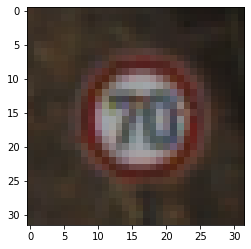

In [12]:
plt.imshow(X_test[1000])

In [34]:
labels_dict[np.argmax(y_pred_prob[1000])]

'Speed limit (70km/h)'

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
plt.bar(range(43), y_pred_prob[1000])

In [0]:
def predict(model_trained, X_test, y_test, scoring =accuracy_score):

  y_test_norm =np.argmax(y_test, axis =1)

  y_pred_prob=model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis = 1)

  return scoring(y_test_norm, y_pred)

In [31]:
predict(model_trained, X_test, y_test)

0.8453514739229024

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)


In [38]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential ([
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),   

      Dense(1024, activation='relu'), 
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),             
   ])


train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 6.8751 - accuracy: 0.2337 - val_loss: 1.9129 - val_accuracy: 0.4781
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 1.7540 - accuracy: 0.4897 - val_loss: 1.0151 - val_accuracy: 0.7354
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 1.0762 - accuracy: 0.6745 - val_loss: 0.4200 - val_accuracy: 0.9027
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6824 - accuracy: 0.7972 - val_loss: 0.2602 - val_accuracy: 0.9478
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4509 - accuracy: 0.8599 - val_loss: 0.1266 - val_accuracy: 0.9724


0.8859410430839002

In [39]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential ([
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),   

      Dense(1024, activation='relu'), 
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),             
   ])


train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 2.5005 - accuracy: 0.4667 - val_loss: 0.5359 - val_accuracy: 0.8630
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.5992 - accuracy: 0.8185 - val_loss: 0.1515 - val_accuracy: 0.9646
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.3364 - accuracy: 0.8996 - val_loss: 0.0885 - val_accuracy: 0.9796
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2270 - accuracy: 0.9313 - val_loss: 0.0529 - val_accuracy: 0.9861
Epoch 5/5
272/272 [==============================] - 5s 19ms/step - loss: 0.1712 - accuracy: 0.9476 - val_loss: 0.0295 - val_accuracy: 0.9938


0.9605442176870749

In [41]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential ([
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),   

      Dense(1024, activation='relu'), 
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),             
   ])

#get_cnn_v5(input_shape, num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 2.4620 - accuracy: 0.3296 - val_loss: 0.8297 - val_accuracy: 0.7652
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.8065 - accuracy: 0.7496 - val_loss: 0.2403 - val_accuracy: 0.9341
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.3904 - accuracy: 0.8784 - val_loss: 0.1011 - val_accuracy: 0.9760
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2637 - accuracy: 0.9189 - val_loss: 0.0662 - val_accuracy: 0.9840
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1942 - accuracy: 0.9409 - val_loss: 0.0559 - val_accuracy: 0.9841


0.9619047619047619

In [43]:
def get_cnn_v6(input_shape, num_classes):
  return Sequential ([
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
      Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
      Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
      MaxPool2D(),
      Dropout(0.3),

      Flatten(),   

      Dense(1024, activation='relu'), 
      Dropout(0.3),

      Dense(1024, activation='relu'), 
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),             
   ])

#get_cnn_v5(input_shape, num_classes).summary()
train_and_predict(get_cnn_v6(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.5101 - accuracy: 0.3123 - val_loss: 0.8042 - val_accuracy: 0.7411
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.8512 - accuracy: 0.7289 - val_loss: 0.3411 - val_accuracy: 0.8954
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4500 - accuracy: 0.8573 - val_loss: 0.1416 - val_accuracy: 0.9547
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.3298 - accuracy: 0.8996 - val_loss: 0.0767 - val_accuracy: 0.9773
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2417 - accuracy: 0.9274 - val_loss: 0.0515 - val_accuracy: 0.9861


0.9619047619047619

In [45]:
X_train[0].shape

(32, 32, 3)

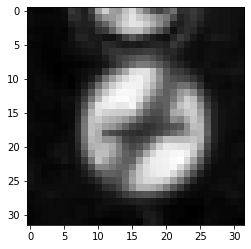

In [49]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
X_train_gray =  color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray =  color.rgb2gray(X_test).reshape(-1,32,32,1)

In [61]:
model = get_cnn_v6((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray,y_train)
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6234 - accuracy: 0.2553 - val_loss: 0.8382 - val_accuracy: 0.7359
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.6211 - accuracy: 0.7973 - val_loss: 0.1474 - val_accuracy: 0.9553
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2668 - accuracy: 0.9132 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1661 - accuracy: 0.9457 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1290 - accuracy: 0.9592 - val_loss: 0.0268 - val_accuracy: 0.9920


0.9687074829931973

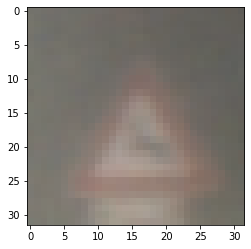

In [63]:
plt.imshow(X_train[400])

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2]= exposure.equalize_adapthist(hsv[:,:,2])
  img= color.hsv2rgb(hsv)
  return img

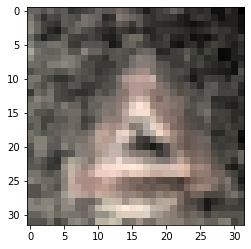

In [67]:
plt.imshow(preproc_img(X_train[400]))

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential ([
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
   MaxPool2D(),
   Dropout(0.5),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
   MaxPool2D(),
   Dropout(0.3),


   Flatten(),   
   Dense(1024, activation='relu'), 
   Dropout(0.5),
   Dense(num_classes, activation='softmax'),             
   ])
  
#get_cnn_v2(input_shape, num_classes).summary()